This note estimates the orientation angles between different ICRFs and the stability of these estimates.

I used two kinds of bootstrap resampling: with/without replacement.

For each sample, I estimated the orientation angles with referred to ICRF3 SX catalog based on the whole sample or the "clean" sample.

In [1]:
from astropy.table import join, Table
from astropy import units as u
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

# My progs
from my_progs.vlbi.sou_func import read_crf
from my_progs.catalog.read_icrf import read_icrf3, read_icrf2
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting
from tool_func import vsh_fit_for_pos, sample_clean

In [2]:
icrf2 = read_icrf2()
icrf3sx = read_icrf3(wv="sx")
icrf3k = read_icrf3(wv="k")
icrf3xka = read_icrf3(wv="xka")

# Defining source list
def_list = Table([icrf3sx[icrf3sx["type"] == "D"]["iers_name"]])

In [3]:
# Various solutions
opa2019a = read_crf("../data/ivs-solutions/opa2019a.crf",
                    drop_few_obs=True, analy_cen="opa")
asi2020a = read_crf("../data/ivs-solutions/asi2020a.crf",
                    drop_few_obs=True, analy_cen="asi")
aus2020b = read_crf("../data/ivs-solutions/aus2020b.crf",
                    drop_few_obs=True, analy_cen="aus")
usn2019c = read_crf("../data/ivs-solutions/usn2019c.crf",
                    drop_few_obs=True, analy_cen="usn")

There are 4468 sources in the original catalog, 2 (0%) sources with #obs < 3 dropped, leaving 4466 sources in the present catalog.
There are 4447 sources in the original catalog, 0 (0%) sources with #obs < 3 dropped, leaving 4447 sources in the present catalog.
There are 4817 sources in the original catalog, 0 (0%) sources with #obs < 3 dropped, leaving 4817 sources in the present catalog.
There are 2390 sources in the original catalog, 0 (0%) sources with #obs < 3 dropped, leaving 2390 sources in the present catalog.


In [4]:
oft_2_sx = radio_cat_diff_calc(icrf2, icrf3sx, sou_name="iers_name")
oft_2_sx_def = join(oft_2_sx, def_list, keys="iers_name")

oft_k_sx = radio_cat_diff_calc(icrf3k, icrf3sx, sou_name="iers_name")
oft_k_sx_def = join(oft_k_sx, def_list, keys="iers_name")

oft_ka_sx = radio_cat_diff_calc(icrf3xka, icrf3sx, sou_name="iers_name")
oft_ka_sx_def = join(oft_ka_sx, def_list, keys="iers_name")

In [5]:
oft_opa_sx = radio_cat_diff_calc(opa2019a, icrf3sx, sou_name="iers_name")
oft_opa_sx_def = join(oft_opa_sx, def_list, keys="iers_name")

oft_asi_sx = radio_cat_diff_calc(asi2020a, icrf3sx, sou_name="iers_name")
oft_asi_sx_def = join(oft_asi_sx, def_list, keys="iers_name")

oft_aus_sx = radio_cat_diff_calc(aus2020b, icrf3sx, sou_name="iers_name")
oft_aus_sx_def = join(oft_aus_sx, def_list, keys="iers_name")

oft_usn_sx = radio_cat_diff_calc(usn2019c, icrf3sx, sou_name="iers_name")
oft_usn_sx_def = join(oft_usn_sx, def_list, keys="iers_name")

The number of common sources in the K-band catalog to the SX catalog is 793 (824 in K-band), 
and for Ka-band it is 638 (all 678).

Where are the missing sources? No idea (maybe Sebastien knows something).

Between ICRF2 and ICRF3, I only find 3410 sources.

(I remember I reported this issus before. The possible reason could be the update of the IERS designation)

# Orientation distribution

## a) ICRF2 vs. ICRF3 SX

## a.1 Orientation for defining sources

In [6]:
print("Between ICRF2 and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_2_sx, print_log=True)

print("Between ICRF2 and ICRF3 SX (with outlier elimination)")
oft_2_sx_cln = sample_clean(oft_2_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_2_sx_cln, print_log=True)

print("Between ICRF2 and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_2_sx_def, print_log=True)

Between ICRF2 and ICRF3 SX (without outlier elimination)
Estimates (  3410 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    +7 +/-   7   +11 +/-   7    +3 +/-   5
----------------------------------------------

Between ICRF2 and ICRF3 SX (with outlier elimination)
For a sample of 3410 sources, the number of the outlier is smaller than 1 when X >= 4.03.
After elimination, there are 3237 sources in the clean sample.
The outlier rate is 5.07%.

Estimates (  3237 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    +9 +/-   4   +14 +/-   4    -2 +/-   3
----------------------------------------------

Between ICRF2 and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   296 sources)
------------

## a.2 Bootstrap sampling

In [7]:
opt2 = Table.read("../logs/icrf2_icrf3sx_orient.fits")
opt21 = Table.read("../logs/icrf2_icrf3sx_orient_cln.fits")

In [8]:
# Mean and Std
# All
R1m_2, R1s_2 = np.mean(opt2["R1"]), np.std(opt2["R1"])
R2m_2, R2s_2 = np.mean(opt2["R2"]), np.std(opt2["R2"])
R3m_2, R3s_2 = np.mean(opt2["R3"]), np.std(opt2["R3"])

# Clean
R1m_21, R1s_21 = np.mean(opt21["R1"]), np.std(opt21["R1"])
R2m_21, R2s_21 = np.mean(opt21["R2"]), np.std(opt21["R2"])
R3m_21, R3s_21 = np.mean(opt21["R3"]), np.std(opt21["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


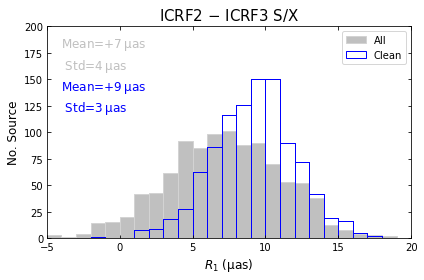

In [9]:
fig, ax = plt.subplots()

bins = np.arange(-50, 50, 1)

ax.hist(opt2["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(opt21["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ (ICRF2 $-$ ICRF3 SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.hist(opt21["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.set_xlabel("$R_1$ ($\mathrm{\\mu as}$)", fontsize=12)

xloc = -4
yloc = [180, 160, 140, 120]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_2,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_2,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_21,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_21,
       fontsize=12, color="b")

ax.axis([-5, 20, 0, 200])

ax.set_title("ICRF2 $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf2-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


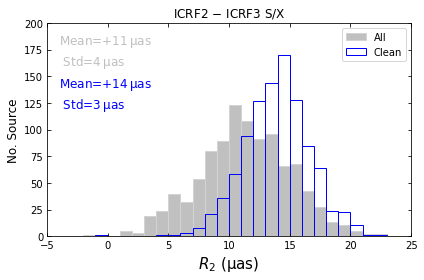

In [10]:
fig, ax = plt.subplots()

bins = np.arange(-40, 40, 1)

ax.hist(opt2["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(opt21["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ (ICRF2 $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

xloc = -4
yloc = [180, 160, 140, 120]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_2,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_2,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_21,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_21,
       fontsize=12, color="b")

ax.axis([-5, 25, 0, 200])
ax.set_xlabel("$R_2$ ($\mathrm{\\mu as}$)", fontsize=15)
ax.set_title("ICRF2 $-$ ICRF3 S/X")

plt.tight_layout()
plt.savefig("../plots/icrf2-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


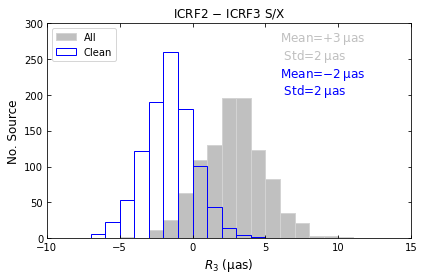

In [11]:
fig, ax = plt.subplots()

bins = np.arange(-50, 50, 1)

ax.hist(opt2["R3"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(opt21["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend(loc="upper left")

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

xloc = 6
yloc = [275, 250, 225, 200]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_2,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_2,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_21,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_21,
       fontsize=12, color="b")

ax.axis([-10, 15, 0, 300])

ax.set_xlabel("$R_3$ ($\mathrm{\\mu as}$)", fontsize=12)
ax.set_title("ICRF2 $-$ ICRF3 S/X")

plt.tight_layout()
plt.savefig("../plots/icrf2-icrf3sx-R3.eps")

## b) ICRF3 K vs ICRF3 SX

## a.1 Orientation for defining sources

In [12]:
print("Between ICRF3 K and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_k_sx, print_log=True)

print("Between ICRF3 K and ICRF3 SX (with outlier elimination)")
oft_k_sx_cln = sample_clean(oft_k_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_k_sx_cln, print_log=True)

print("Between ICRF3 K and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_k_sx_def, print_log=True)

Between ICRF3 K and ICRF3 SX (without outlier elimination)
Estimates (   793 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -22 +/-  24   -33 +/-  24    +1 +/-  14
----------------------------------------------

Between ICRF3 K and ICRF3 SX (with outlier elimination)
For a sample of 793 sources, the number of the outlier is smaller than 1 when X >= 3.65.
After elimination, there are 753 sources in the clean sample.
The outlier rate is 5.04%.

Estimates (   753 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -11 +/-   7   -18 +/-   6    -7 +/-   4
----------------------------------------------

Between ICRF3 K and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   193 sources)
--------

## b.2 Bootstrap sampling

In [13]:
optk = Table.read("../logs/icrf3k_icrf3sx_orient.fits")
optk1 = Table.read("../logs/icrf3k_icrf3sx_orient_cln.fits")

In [14]:
# Mean and Std
# All
R1m_k, R1s_k = np.mean(optk["R1"]), np.std(optk["R1"])
R2m_k, R2s_k = np.mean(optk["R2"]), np.std(optk["R2"])
R3m_k, R3s_k = np.mean(optk["R3"]), np.std(optk["R3"])

# Clean
R1m_k1, R1s_k1 = np.mean(optk1["R1"]), np.std(optk1["R1"])
R2m_k1, R2s_k1 = np.mean(optk1["R2"]), np.std(optk1["R2"])
R3m_k1, R3s_k1 = np.mean(optk1["R3"]), np.std(optk1["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


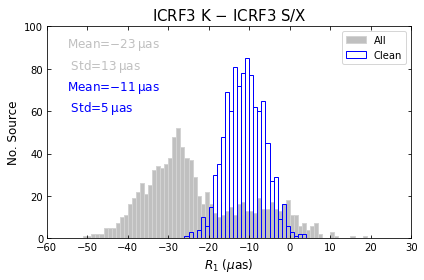

In [15]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optk["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optk1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-60, 30, 0, 100])

xloc = -55
yloc = [90, 80, 70, 60]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_k,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_k,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_k1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_k1,
       fontsize=12, color="b")

ax.set_title("ICRF3 K $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf3k-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


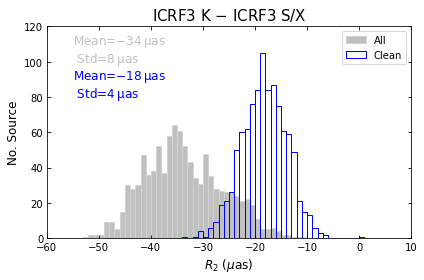

In [16]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optk["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optk1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-60, 10, 0, 120])

xloc = -55
yloc = [110, 100, 90, 80]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_k,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_k,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_k1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_k1,
       fontsize=12, color="b")

ax.set_title("ICRF3 K $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf3k-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


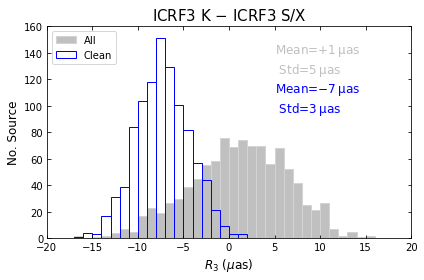

In [17]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optk["R3"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optk1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend(loc="upper left")

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-20, 20, 0, 160])

xloc = 5
yloc = [140, 125, 110, 95]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_k,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_k,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_k1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_k1,
       fontsize=12, color="b")

ax.set_title("ICRF3 K $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf3k-icrf3sx-R3.eps")

# c) ICRF3 XKa vs ICRF3 SX

## c.1 Orientation for defining sources

In [18]:
print("Between ICRF3 XKa and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_ka_sx, print_log=True)

print("Between ICRF3 XKa and ICRF3 SX (with outlier elimination)")
oft_ka_sx_cln = sample_clean(oft_ka_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_ka_sx_cln, print_log=True)

print("Between ICRF3 XKa and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_ka_sx_def, print_log=True)

Between ICRF3 XKa and ICRF3 SX (without outlier elimination)
Estimates (   638 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    -7 +/-  13    -6 +/-  13   +67 +/-   9
----------------------------------------------

Between ICRF3 XKa and ICRF3 SX (with outlier elimination)
For a sample of 638 sources, the number of the outlier is smaller than 1 when X >= 3.59.
After elimination, there are 402 sources in the clean sample.
The outlier rate is 36.99%.

Estimates (   402 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -16 +/-  11    -3 +/-  10   +46 +/-   7
----------------------------------------------

Between ICRF3 XKa and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   176 sources)
-

## c.2 Bootstrap sampling

In [19]:
optka = Table.read("../logs/icrf3xka_icrf3sx_orient.fits")
optka1 = Table.read("../logs/icrf3xka_icrf3sx_orient_cln.fits")

In [20]:
# Mean and Std
# All
R1m_ka, R1s_ka = np.mean(optka["R1"]), np.std(optka["R1"])
R2m_ka, R2s_ka = np.mean(optka["R2"]), np.std(optka["R2"])
R3m_ka, R3s_ka = np.mean(optka["R3"]), np.std(optka["R3"])

# Clean
R1m_ka1, R1s_ka1 = np.mean(optka1["R1"]), np.std(optka1["R1"])
R2m_ka1, R2s_ka1 = np.mean(optka1["R2"]), np.std(optka1["R2"])
R3m_ka1, R3s_ka1 = np.mean(optka1["R3"]), np.std(optka1["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


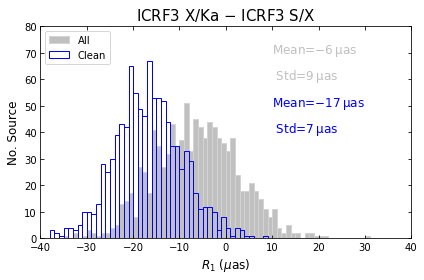

In [21]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optka["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optka1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend(loc="upper left")

ax.set_xlabel("$R_1$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-40, 40, 0, 80])

xloc = 10
yloc = [70, 60, 50, 40]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_ka,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_ka,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_ka1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_ka1,
       fontsize=12, color="b")

ax.set_title("ICRF3 X/Ka $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf3ka-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


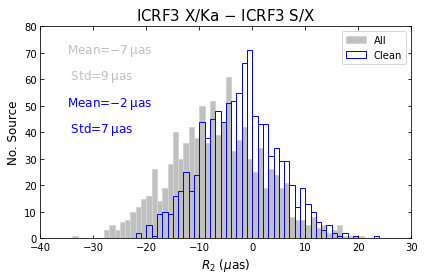

In [22]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optka["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optka1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-40, 30, 0, 80])

xloc = -35
yloc = [70, 60, 50, 40]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_ka,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_ka,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_ka1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_ka1,
       fontsize=12, color="b")

ax.set_title("ICRF3 X/Ka $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf3ka-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


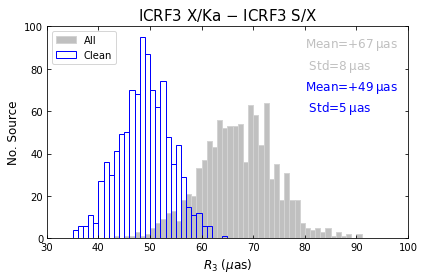

In [23]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optka["R3"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optka1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend(loc="upper left")

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([30, 100, 0, 100])

xloc = 80
yloc = [90, 80, 70, 60]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_ka,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_ka,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_ka1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_ka1,
       fontsize=12, color="b")

ax.set_title("ICRF3 X/Ka $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf3ka-icrf3sx-R3.eps")

## d) opa2019a vs. ICRF3 SX

## d.1 Orientation for defining sources

In [24]:
print("Between opa2019a and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_opa_sx, print_log=True)

print("Between opa2019a and ICRF3 SX (with outlier elimination)")
oft_opa_sx_cln = sample_clean(oft_opa_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_opa_sx_cln, print_log=True)

print("Between opa2019a and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_opa_sx_def, print_log=True)

Between opa2019a and ICRF3 SX (without outlier elimination)
Estimates (  4380 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   +24 +/-   8   -45 +/-   7    -0 +/-   5
----------------------------------------------

Between opa2019a and ICRF3 SX (with outlier elimination)
For a sample of 4380 sources, the number of the outlier is smaller than 1 when X >= 4.10.
After elimination, there are 4348 sources in the clean sample.
The outlier rate is 0.73%.

Estimates (  4348 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   +26 +/-   1   -51 +/-   1    -2 +/-   1
----------------------------------------------

Between opa2019a and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   303 sources)
---

## d.2 Bootstrap sampling

In [25]:
optopa = Table.read("../logs/opa2019a_icrf3sx_orient.fits")
optopa1 = Table.read("../logs/opa2019a_icrf3sx_orient_cln.fits")

In [26]:
# Mean and Std
# All
R1m_opa, R1s_opa = np.mean(optopa["R1"]), np.std(optopa["R1"])
R2m_opa, R2s_opa = np.mean(optopa["R2"]), np.std(optopa["R2"])
R3m_opa, R3s_opa = np.mean(optopa["R3"]), np.std(optopa["R3"])

# Clean
R1m_opa1, R1s_opa1 = np.mean(optopa1["R1"]), np.std(optopa1["R1"])
R2m_opa1, R2s_opa1 = np.mean(optopa1["R2"]), np.std(optopa1["R2"])
R3m_opa1, R3s_opa1 = np.mean(optopa1["R3"]), np.std(optopa1["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


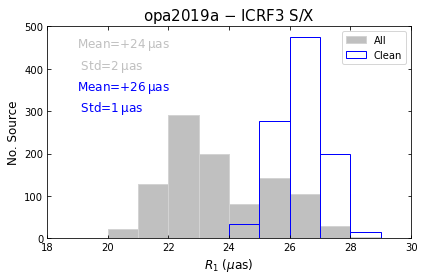

In [27]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optopa["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optopa1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([18, 30, 0, 500])

xloc = 19
yloc = [450, 400, 350, 300]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_opa,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_opa,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_opa1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_opa1,
       fontsize=12, color="b")

ax.set_title("opa2019a $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/opa-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


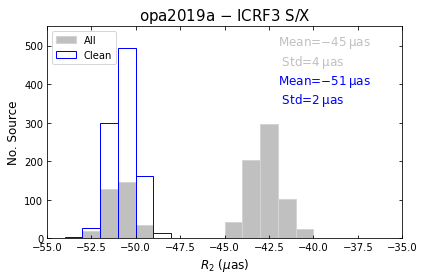

In [28]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optopa["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optopa1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend(loc="upper left")

ax.set_xlabel("$R_2$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-55, -35, 0, 550])

xloc = -42
yloc = [500, 450, 400, 350]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_opa,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_opa,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_opa1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_opa1,
       fontsize=12, color="b")

ax.set_title("opa2019a $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/opa-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


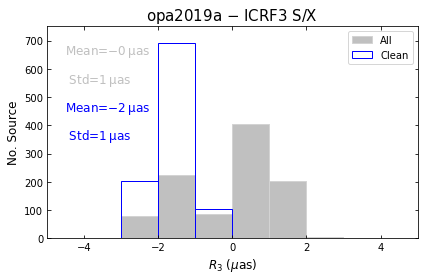

In [29]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optopa["R3"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optopa1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-5, 5, 0, 750])

xloc = -4.5
yloc = np.array([700, 600, 500, 400])-50
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_opa,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_opa,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_opa1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_opa1,
        fontsize=12, color="b")

ax.set_title("opa2019a $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/opa-icrf3sx-R3.eps")

## e) asi2020a vs. ICRF3 SX

## e.1 Orientation for defining sources

In [30]:
print("Between asi2020a and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_asi_sx, print_log=True)

print("Between asi2020a and ICRF3 SX (with outlier elimination)")
oft_asi_sx_cln = sample_clean(oft_asi_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_asi_sx_cln, print_log=True)

print("Between asi2020a and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_asi_sx_def, print_log=True)

Between asi2020a and ICRF3 SX (without outlier elimination)
Estimates (  4296 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    -8 +/-  12   +15 +/-  10    +5 +/-   6
----------------------------------------------

Between asi2020a and ICRF3 SX (with outlier elimination)
For a sample of 4296 sources, the number of the outlier is smaller than 1 when X >= 4.09.
After elimination, there are 4271 sources in the clean sample.
The outlier rate is 0.58%.

Estimates (  4271 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    -2 +/-   3    +7 +/-   2    +7 +/-   1
----------------------------------------------

Between asi2020a and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   290 sources)
---

## e.2 Bootstrap sampling

In [31]:
optasi = Table.read("../logs/asi2020a_icrf3sx_orient.fits")
optasi1 = Table.read("../logs/asi2020a_icrf3sx_orient_cln.fits")

In [32]:
# Mean and Std
# All
R1m_asi, R1s_asi = np.mean(optasi["R1"]), np.std(optasi["R1"])
R2m_asi, R2s_asi = np.mean(optasi["R2"]), np.std(optasi["R2"])
R3m_asi, R3s_asi = np.mean(optasi["R3"]), np.std(optasi["R3"])

# Clean
R1m_asi1, R1s_asi1 = np.mean(optasi1["R1"]), np.std(optasi1["R1"])
R2m_asi1, R2s_asi1 = np.mean(optasi1["R2"]), np.std(optasi1["R2"])
R3m_asi1, R3s_asi1 = np.mean(optasi1["R3"]), np.std(optasi1["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


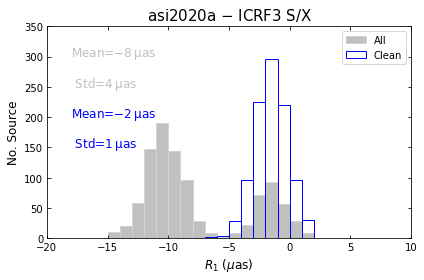

In [33]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optasi["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optasi1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-20, 10, 0, 350])

xloc = -18
yloc = [300, 250, 200, 150]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_asi,
       fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_asi,
       fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_asi1,
       fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_asi1,
       fontsize=12, color="b")

ax.set_title("asi2020a $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/asi-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


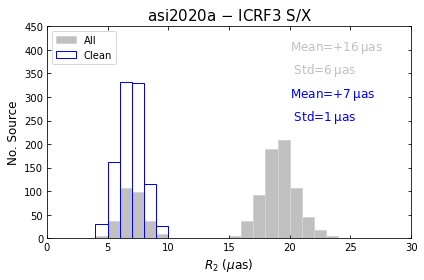

In [34]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optasi["R2"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optasi1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend(loc="upper left")

ax.set_xlabel("$R_2$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([0, 30, 0, 450])

xloc = 20
yloc = [400, 350, 300, 250]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_asi,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_asi,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_asi1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_asi1,
        fontsize=12, color="b")

ax.set_title("asi2020a $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/asi-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


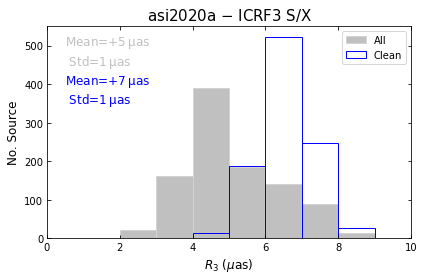

In [35]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optasi["R3"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optasi1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([0, 10, 0, 550])

xloc = 0.5
yloc = np.array([500, 450, 400, 350])
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_asi,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_asi,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_asi1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_asi1,
        fontsize=12, color="b")

ax.set_title("asi2020a $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/asi-icrf3sx-R3.eps")

## f) aus2020b vs. ICRF3 SX

## f.1 Orientation for defining sources

In [36]:
print("Between aus2020b and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_aus_sx, print_log=True)

print("Between aus2020b and ICRF3 SX (with outlier elimination)")
oft_aus_sx_cln = sample_clean(oft_aus_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_aus_sx_cln, print_log=True)

print("Between aus2020b and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_aus_sx_def, print_log=True)

Between aus2020b and ICRF3 SX (without outlier elimination)
Estimates (  4456 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -15 +/-  15    +5 +/-  16    -7 +/-  15
----------------------------------------------

Between aus2020b and ICRF3 SX (with outlier elimination)
For a sample of 4456 sources, the number of the outlier is smaller than 1 when X >= 4.10.
After elimination, there are 4378 sources in the clean sample.
The outlier rate is 1.75%.

Estimates (  4378 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -14 +/-   3    +3 +/-   3    -7 +/-   3
----------------------------------------------

Between aus2020b and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   299 sources)
---

## f.2 Bootstrap sampling

In [37]:
optaus = Table.read("../logs/aus2020b_icrf3sx_orient.fits")
optaus1 = Table.read("../logs/aus2020b_icrf3sx_orient_cln.fits")

In [38]:
# Mean and Std
# All
R1m_aus, R1s_aus = np.mean(optaus["R1"]), np.std(optaus["R1"])
R2m_aus, R2s_aus = np.mean(optaus["R2"]), np.std(optaus["R2"])
R3m_aus, R3s_aus = np.mean(optaus["R3"]), np.std(optaus["R3"])

# Clean
R1m_aus1, R1s_aus1 = np.mean(optaus1["R1"]), np.std(optaus1["R1"])
R2m_aus1, R2s_aus1 = np.mean(optaus1["R2"]), np.std(optaus1["R2"])
R3m_aus1, R3s_aus1 = np.mean(optaus1["R3"]), np.std(optaus1["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


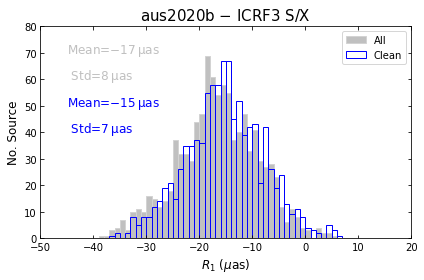

In [39]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optaus["R1"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optaus1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-50, 20, 0, 80])

xloc = -45
yloc = [70, 60, 50, 40]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_aus,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_aus,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_aus1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_aus1,
        fontsize=12, color="b")

ax.set_title("aus2020b $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/aus-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


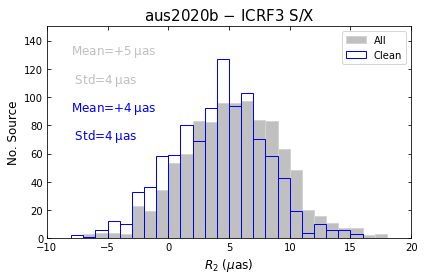

In [40]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optaus["R2"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optaus1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-10, 20, 0, 150])

xloc = -8
yloc = np.array([140, 120, 100, 80])-10
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_aus,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_aus,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_aus1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_aus1,
        fontsize=12, color="b")

ax.set_title("aus2020b $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/aus-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


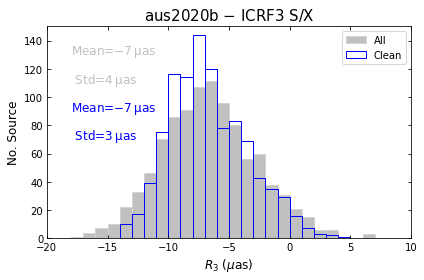

In [41]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optaus["R3"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optaus1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-20, 10, 0, 150])

xloc = -18
yloc = np.array([130, 110, 90, 70])
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_aus,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_aus,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_aus1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_aus1,
        fontsize=12, color="b")

ax.set_title("aus2020b $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/aus-icrf3sx-R3.eps")

## g) usn2019c vs. ICRF3 SX

## g.1 Orientation for defining sources

In [42]:
print("Between usn2019c and ICRF3 SX (without outlier elimination)")
_ = vsh_fit_for_pos(oft_usn_sx, print_log=True)

print("Between usn2019c and ICRF3 SX (with outlier elimination)")
oft_usn_sx_cln = sample_clean(oft_usn_sx, rho0=10, print_log=True)
_ = vsh_fit_for_pos(oft_usn_sx_cln, print_log=True)

print("Between usn2019c and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fit_for_pos(oft_usn_sx_def, print_log=True)

Between usn2019c and ICRF3 SX (without outlier elimination)
Estimates (  2263 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    +3 +/-   1    -0 +/-   1   +13 +/-   1
----------------------------------------------

Between usn2019c and ICRF3 SX (with outlier elimination)
For a sample of 2263 sources, the number of the outlier is smaller than 1 when X >= 3.93.
After elimination, there are 2216 sources in the clean sample.
The outlier rate is 2.08%.

Estimates (  2216 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
    +3 +/-   1    -0 +/-   1   +13 +/-   1
----------------------------------------------

Between usn2019c and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   292 sources)
---

## g.2 Bootstrap sampling

In [43]:
optusn = Table.read("../logs/usn2019c_icrf3sx_orient.fits")
optusn1 = Table.read("../logs/usn2019c_icrf3sx_orient_cln.fits")

In [44]:
# Mean and Std
# All
R1m_usn, R1s_usn = np.mean(optusn["R1"]), np.std(optusn["R1"])
R2m_usn, R2s_usn = np.mean(optusn["R2"]), np.std(optusn["R2"])
R3m_usn, R3s_usn = np.mean(optusn["R3"]), np.std(optusn["R3"])

# Clean
R1m_usn1, R1s_usn1 = np.mean(optusn1["R1"]), np.std(optusn1["R1"])
R2m_usn1, R2s_usn1 = np.mean(optusn1["R2"]), np.std(optusn1["R2"])
R3m_usn1, R3s_usn1 = np.mean(optusn1["R3"]), np.std(optusn1["R3"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


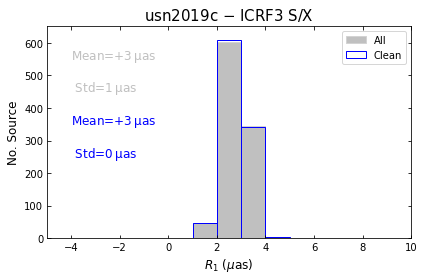

In [45]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optusn["R1"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optusn1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-5, 10, 0, 650])

xloc = -4
yloc = [550, 450, 350, 250]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_usn,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_usn,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_usn1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R1s_usn1,
        fontsize=12, color="b")

ax.set_title("usn2019c $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/usn-icrf3sx-R1.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


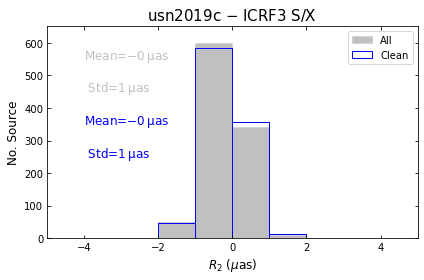

In [46]:
fig, ax = plt.subplots()

bins = np.arange(-120, 120, 1)

ax.hist(optusn["R2"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optusn1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([-5, 5, 0, 650])

xloc = -4
yloc = [550, 450, 350, 250]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_usn,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_usn,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_usn1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R2s_usn1,
        fontsize=12, color="b")

ax.set_title("usn2019c $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/usn-icrf3sx-R2.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


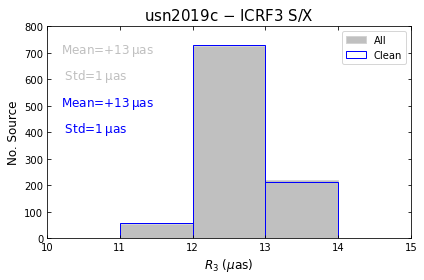

In [47]:
fig, ax = plt.subplots()

bins = np.arange(-100, 100, 1)

ax.hist(optusn["R3"], bins, histtype="bar", color="silver",
        edgecolor="lightgrey", label="All")
ax.hist(optusn1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ ($\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.axis([10, 15, 0, 800])

xloc = 10.2
yloc = [700, 600, 500, 400]
ax.text(xloc, yloc[0], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_usn,
        fontsize=12, color="silver")
ax.text(xloc, yloc[1], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_usn,
        fontsize=12, color="silver")
ax.text(xloc, yloc[2], "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_usn1,
        fontsize=12, color="b")
ax.text(xloc, yloc[3], " Std=$\mathrm{%2.0f\,\mu as}$" % R3s_usn1,
        fontsize=12, color="b")

ax.set_title("usn2019c $-$ ICRF3 S/X", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/usn-icrf3sx-R3.eps")

# Statistic results

In [48]:
cat = ["ICRF2", "ICRF3 K", "ICRF3 X/Ka", "opa2019a", "asi2020a", "aus2020b", "usn2019c"]

N_com = [3410, 793, 638, 4380, 4296, 4456, 2263]
N_pick = [2300, 550, 450, 3000, 3000, 3000, 1500]

## a) use all sources without replacement

In [49]:
data = np.vstack([
    # ICRF2
    [
        np.mean(opt2["R1"]),
        np.std(opt2["R1"]),
        np.mean(opt2["R2"]),
        np.std(opt2["R2"]),
        np.mean(opt2["R3"]),
        np.std(opt2["R3"])
    ],
    # ICRF3 K
    [
        np.mean(optk["R1"]),
        np.std(optk["R1"]),
        np.mean(optk["R2"]),
        np.std(optk["R2"]),
        np.mean(optk["R3"]),
        np.std(optk["R3"])
    ],
    # ICRF3 X/Ka
    [
        np.mean(optka["R1"]),
        np.std(optka["R1"]),
        np.mean(optka["R2"]),
        np.std(optka["R2"]),
        np.mean(optka["R3"]),
        np.std(optka["R3"])
    ],
    # opa2019a
    [
        np.mean(optopa["R1"]),
        np.std(optopa["R1"]),
        np.mean(optopa["R2"]),
        np.std(optopa["R2"]),
        np.mean(optopa["R3"]),
        np.std(optopa["R3"])
    ],
    # asi2020a
    [
        np.mean(optasi["R1"]),
        np.std(optasi["R1"]),
        np.mean(optasi["R2"]),
        np.std(optasi["R2"]),
        np.mean(optasi["R3"]),
        np.std(optasi["R3"])
    ],
    # aus2020b
    [
        np.mean(optaus["R1"]),
        np.std(optaus["R1"]),
        np.mean(optaus["R2"]),
        np.std(optaus["R2"]),
        np.mean(optaus["R3"]),
        np.std(optaus["R3"])
    ],
    # usn2019c
    [
        np.mean(optusn["R1"]),
        np.std(optusn["R1"]),
        np.mean(optusn["R2"]),
        np.std(optusn["R2"]),
        np.mean(optusn["R3"]),
        np.std(optusn["R3"])
    ],
])

data = data.T

In [50]:
tab = Table([cat, N_com, N_pick, *data],
            names=["catalog", "num_com", "num_pick", "R1_m", "R1_std", "R2_m", "R2_std", "R3_m", "R3_std"])

tab["catalog"].format = "%8s"

tab["R1_m"].format = "$%+4.0f$"
tab["R2_m"].format = "$%+4.0f$"
tab["R3_m"].format = "$%+4.0f$"

tab["R1_std"].format = "%3.0f"
tab["R2_std"].format = "%3.0f"
tab["R3_std"].format = "%3.0f"

tab

catalog,num_com,num_pick,R1_m,R1_std,R2_m,R2_std,R3_m,R3_std
str10,int64,int64,float64,float64,float64,float64,float64,float64
ICRF2,3410,2300,$ +7$,4,$ +11$,4,$ +3$,2
ICRF3 K,793,550,$ -23$,13,$ -34$,8,$ +1$,5
ICRF3 X/Ka,638,450,$ -6$,9,$ -7$,9,$ +67$,8
opa2019a,4380,3000,$ +24$,2,$ -45$,4,$ -0$,1
asi2020a,4296,3000,$ -8$,4,$ +16$,6,$ +5$,1
aus2020b,4456,3000,$ -17$,8,$ +5$,4,$ -7$,4
usn2019c,2263,1500,$ +3$,1,$ -0$,1,$ +13$,1


In [51]:
# tab["R1_std"].format = "$\pm$%3.0f"
# tab["R2_std"].format = "$\pm$%3.0f"
# tab["R3_std"].format = "$\pm$%3.0f"

# tab.write("../logs/icrf-orient-sta.tex", format="ascii.latex", overwrite=True)

## b) use clean samples without replacement

In [52]:
data1 = np.vstack([
    # ICRF2
    [
        np.mean(opt21["R1"]),
        np.std(opt21["R1"]),
        np.mean(opt21["R2"]),
        np.std(opt21["R2"]),
        np.mean(opt21["R3"]),
        np.std(opt21["R3"])
    ],
    # ICRF3 K
    [
        np.mean(optk1["R1"]),
        np.std(optk1["R1"]),
        np.mean(optk1["R2"]),
        np.std(optk1["R2"]),
        np.mean(optk1["R3"]),
        np.std(optk1["R3"])
    ],
    # ICRF3 X/Ka
    [
        np.mean(optka1["R1"]),
        np.std(optka1["R1"]),
        np.mean(optka1["R2"]),
        np.std(optka1["R2"]),
        np.mean(optka1["R3"]),
        np.std(optka1["R3"])
    ],
    # opa2019a
    [
        np.mean(optopa1["R1"]),
        np.std(optopa1["R1"]),
        np.mean(optopa1["R2"]),
        np.std(optopa1["R2"]),
        np.mean(optopa1["R3"]),
        np.std(optopa1["R3"])
    ],
    # asi2020a
    [
        np.mean(optasi1["R1"]),
        np.std(optasi1["R1"]),
        np.mean(optasi1["R2"]),
        np.std(optasi1["R2"]),
        np.mean(optasi1["R3"]),
        np.std(optasi1["R3"])
    ],
    # aus2020b
    [
        np.mean(optaus1["R1"]),
        np.std(optaus1["R1"]),
        np.mean(optaus1["R2"]),
        np.std(optaus1["R2"]),
        np.mean(optaus1["R3"]),
        np.std(optaus1["R3"])
    ],
    # usn2019c
    [
        np.mean(optusn1["R1"]),
        np.std(optusn1["R1"]),
        np.mean(optusn1["R2"]),
        np.std(optusn1["R2"]),
        np.mean(optusn1["R3"]),
        np.std(optusn1["R3"])
    ],
])

data1 = data1.T

In [53]:
tab1 = Table([cat, N_com, N_pick, *data1],
             names=["catalog", "num_com", "num_pick", "R1_m", "R1_std", "R2_m", "R2_std", "R3_m", "R3_std"])

tab1["catalog"].format = "%8s"

tab1["R1_m"].format = "$%+4.0f$"
tab1["R2_m"].format = "$%+4.0f$"
tab1["R3_m"].format = "$%+4.0f$"

tab1["R1_std"].format = "%3.0f"
tab1["R2_std"].format = "%3.0f"
tab1["R3_std"].format = "%3.0f"

tab1

catalog,num_com,num_pick,R1_m,R1_std,R2_m,R2_std,R3_m,R3_std
str10,int64,int64,float64,float64,float64,float64,float64,float64
ICRF2,3410,2300,$ +9$,3,$ +14$,3,$ -2$,2
ICRF3 K,793,550,$ -11$,5,$ -18$,4,$ -7$,3
ICRF3 X/Ka,638,450,$ -17$,7,$ -2$,7,$ +49$,5
opa2019a,4380,3000,$ +26$,1,$ -51$,2,$ -2$,1
asi2020a,4296,3000,$ -2$,1,$ +7$,1,$ +7$,1
aus2020b,4456,3000,$ -15$,7,$ +4$,4,$ -7$,3
usn2019c,2263,1500,$ +3$,0,$ -0$,1,$ +13$,1


In [54]:
tab1["R1_std"].format = "$\pm$%3.0f"
tab1["R2_std"].format = "$\pm$%3.0f"
tab1["R3_std"].format = "$\pm$%3.0f"

tab1.write("../logs/icrf-orient-sta.tex", format="ascii.latex", overwrite=True)